# Quantum Neural Networks

### Quantum Neural Networks from scratch using Python and Qiskit
https://medium.com/@SMalapet/quantum-neural-networks-from-scratch-using-python-and-qiskit-d90d41af2a9a

### Quantum computing and its applications series: Introduction to quantum computer
https://medium.com/@SMalapet/quantum-computing-and-its-applications-series-introduction-to-quantum-computer-2850041c0042

### Quantum computing and its applications series: Simple quantum circuit
https://medium.com/@SMalapet/quantum-computing-and-its-applications-series-simple-quantum-circuit-10bdcadcb285

### Quantum computing and its applications series: Half-Adder circuit
https://medium.com/@SMalapet/quantum-computing-and-its-applications-series-half-adder-circuit-feca147a2f69

### Quantum computing and its applications series: Portfolio optimization of crypto assets using Quantum computer
https://medium.com/@SMalapet/quantum-computing-and-its-applications-series-portfolio-optimization-of-crpyto-assets-using-ca94727fce7

In [1]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister
import copy
import matplotlib.pyplot as plt
import numpy as np
import qiskit

In [2]:
iris = datasets.load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.33,random_state=42)

In [3]:
print(Y_train,len(Y_train))

[0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1] 67


In [4]:
print(X_train[0],len(X_train))

[5.2 3.4 1.4 0.2] 67


In [5]:
# N must be equal number of features
N = 4

In [6]:
# Change data point to different rotation
def feature_map(X,N=4,C=1):
    q = QuantumRegister(N)
    c = ClassicalRegister(C)
    qc = QuantumCircuit(q,c)

    for i,x in enumerate(X):
        qc.rx(x,i)

    return qc,c

In [7]:
def variational_circuit(qc,theta):
    
    # Pass through qubit information from quibit to another qubit
    for i in range(N-1):
        qc.cnot(i,i+1)
    qc.cnot(N-1,0)
    
    # Rotation angle to be learned [optimized]
    for i in range(N):
        qc.ry(theta[i],i)
    return qc

{'0': 3401, '1': 6599}
0.6599


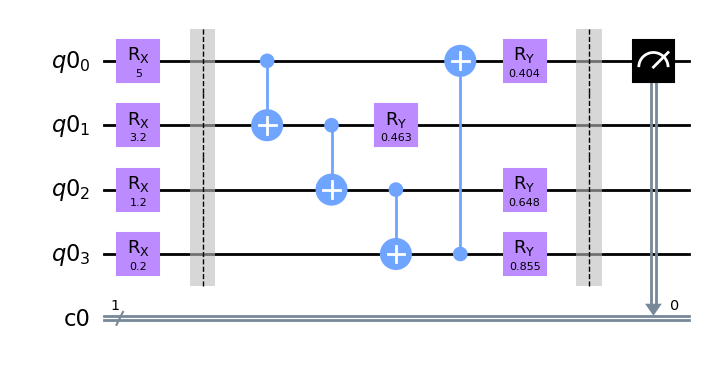

In [8]:
qc,c = feature_map(X_train[5],N,C=1)

qc.barrier()

qc = variational_circuit(qc,np.random.rand(N))

qc.barrier()

qc.measure(0,c)

shots = 1E4
backend = Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc,backend=backend,shots=shots)
result = job.result()
counts = result.get_counts(qc)
print(counts)
print(counts['1']/shots)

qc.draw('mpl')

In [9]:
# Example of targeted label want to be predicted
print(Y_train[1])

1


In [10]:
def quantum_nn(X,theta,N=4,C=1,simulator=True):
    qc,c = feature_map(X,N,C)
    qc = variational_circuit(qc,theta)
    qc.measure(0,c)

    shots = 1E4
    backend = Aer.get_backend('qasm_simulator')
    job = qiskit.execute(qc,backend=backend,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)

    return (counts['1']/shots)

In [11]:
def calc_loss(prediction,target):
    return (prediction-target)**2

In [12]:
prediction = quantum_nn(X_train[6],np.random.rand(N))

In [13]:
target = Y_train[6]

In [14]:
calc_loss(prediction,target)

0.32069569000000003

In [15]:
def gradient(X_i,Y_i,theta):
    delta = 0.01
    grad = []
    dtheta = copy.copy(theta)
    for i in range(len(theta)):
        dtheta[i] += delta

        predict1 = quantum_nn(X_i,dtheta)
        predict2 = quantum_nn(X_i,theta)

        # Finite difference
        grad.append( (calc_loss(predict1,Y_i) - calc_loss(predict2,Y_i)) / delta )
    return np.array(grad)        

In [16]:
def accuracy(X,Y,theta):
    counter = 0
    for X_i,Y_i in zip(X,Y):
        prediction = quantum_nn(X_i,theta)

        if prediction < 0.5 and Y_i == 0:
            counter += 1
        elif prediction >= 0.5 and Y_i == 1:
            counter += 1
    return (counter/len(Y))

In [17]:
epoch = 30
eta = 0.05
loss_list = []
theta = np.ones(N)

print(f'Epoch \t Loss \t Accuracy')
for i in range(epoch):
    loss_tmp = []
    for X_i,Y_i in zip(X_train,Y_train):
        prediction = quantum_nn(X_i,theta)
        loss_tmp.append(calc_loss(prediction,Y_i))
        
        # Update theta by using SGD
        theta = theta - eta*gradient(X_i,Y_i,theta)
    loss_list.append(np.mean(loss_tmp))
    acc = accuracy(X_train,Y_train,theta)

    print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f}')

Epoch 	 Loss 	 Accuracy
0 	 0.288 	 0.164
1 	 0.295 	 0.194
2 	 0.301 	 0.164
3 	 0.300 	 0.179
4 	 0.287 	 0.179
5 	 0.279 	 0.209
6 	 0.267 	 0.149
7 	 0.256 	 0.776
8 	 0.234 	 0.806
9 	 0.224 	 0.806
10 	 0.229 	 0.731
11 	 0.225 	 0.806
12 	 0.225 	 0.791
13 	 0.224 	 0.821
14 	 0.217 	 0.821
15 	 0.213 	 0.851
16 	 0.213 	 0.821
17 	 0.212 	 0.821
18 	 0.206 	 0.836
19 	 0.205 	 0.821
20 	 0.205 	 0.836
21 	 0.203 	 0.836
22 	 0.202 	 0.806
23 	 0.209 	 0.791
24 	 0.207 	 0.851
25 	 0.202 	 0.836
26 	 0.203 	 0.791
27 	 0.201 	 0.836
28 	 0.205 	 0.851
29 	 0.205 	 0.836


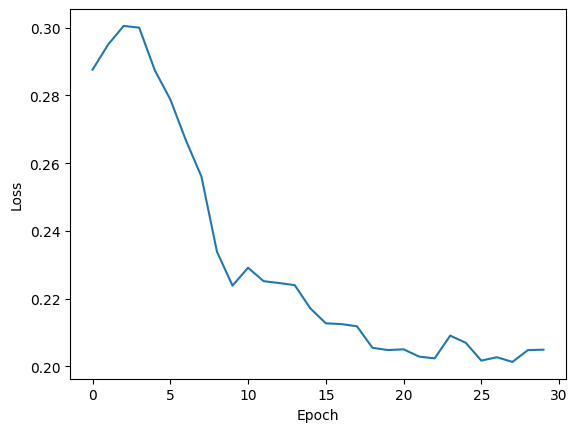

In [18]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
accuracy(X_test,Y_test,theta)

0.7575757575757576